In [4]:
from __future__ import print_function;
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.signal import convolve2d

# Achieves close to 100% accuracy in predicting the x and y co-ordinates and the radius of randomly generated points

In [6]:
def create_training_data():
    l = 10000;
    IMG_SIZE = 200;
    X_train = np.zeros(shape=[l, IMG_SIZE, IMG_SIZE,1]);
    Y_train = np.zeros(shape = [l,3]);
    
    for i in range(l):
        rad = np.random.randint(1,2);
        cx = np.random.randint(rad,IMG_SIZE-rad);
        cy = np.random.randint(rad, IMG_SIZE-rad);
        Y_train[i,0] = cx/IMG_SIZE;
        Y_train[i,1] = cy/IMG_SIZE;
        Y_train[i,2] = rad/IMG_SIZE;
        blank_image = np.ones(shape=[IMG_SIZE, IMG_SIZE], dtype = np.uint8);
        X_train[i,:,:,0] = cv2.circle(blank_image, (cx,cy), rad, 0, -1);
        
    return {'X_Train' : X_train, 'Y_train' : Y_train};

training_data = create_training_data();

(200, 200)
195 177 0


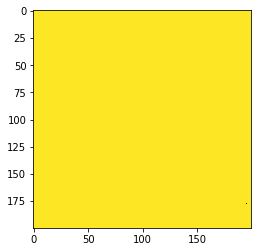

In [29]:
# print(training_data['X_Train'].shape)
# print(len(training_data['X_Train']))
# plt.imshow(training_data['X_Train'][24].reshape(200,200))
# # plt.grid()
# 200*training_data['Y_train']

IMG_SIZE = 200;
rad = np.random.randint(0,1);
cx = np.random.randint(rad,IMG_SIZE-rad);
cy = np.random.randint(rad, IMG_SIZE-rad);
blank_image = np.ones(shape = [IMG_SIZE, IMG_SIZE], dtype = np.uint8);
new_img = cv2.circle(blank_image, (cx,cy), rad, 0, -1);

plt.imshow(new_img)
print(np.shape(new_img))
print(cx,cy,rad)

(3, 3)


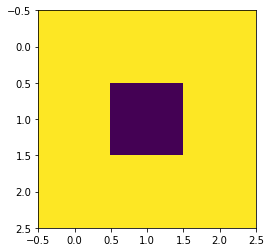

In [30]:
kernel = np.array([[2,2,2],[2,-20,2],[2,2,2]])
plt.imshow(kernel)
print(kernel.shape)

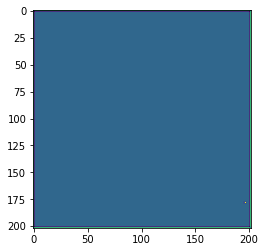

In [31]:
# for h in range(len(training_data['X_Train'])):
# img = convolve2d(training_data['X_Train'][24].reshape(200,200), kernel)

img = convolve2d(new_img, kernel)
plt.imshow(img)

In [32]:
coordinates = [];

for i in range(len(img)):
    for j in range(len(img)):
        if i > 5 and i < 197:
            if j > 5 and j < 197:
                if img[i][j] > 4:
                    coordinates.append([i,j])

In [33]:
x_coord = []
y_coord = []
for i in range(len(coordinates)):
    x_coord.append(coordinates[i][0])
    y_coord.append(coordinates[i][1])
    
print(max(x_coord)-min(x_coord))
print(max(y_coord)-min(y_coord))

radius_x = (max(x_coord)-min(x_coord))/2
radius_y = (max(y_coord)-min(y_coord))/2
center_x = min(x_coord)+radius_x-1
center_y = min(y_coord)+radius_y-1
print(center_y,center_x,radius_x)

0
0
195.0 177.0 0.0


In [34]:
print(cx,cy,rad)

195 177 0
